<a href="https://colab.research.google.com/github/YunilaPutmasari/27_YunilaPutmasari_PemrogramanMobile/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Buat Gamma Correction

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


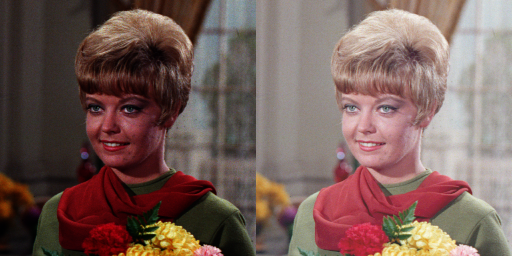

In [2]:
import cv2
import numpy as np

# Fungsi untuk menerapkan gamma correction menggunakan for loop
def adjust_gamma_with_loop(image, gamma=1.0):
    # Membuat citra kosong untuk menyimpan hasil gamma correction
    gamma_corrected_image = np.zeros(image.shape, image.dtype)

    # Menghitung inverse gamma
    inv_gamma = 1.0 / gamma

    # Akses tiap piksel dan terapkan gamma correction
    for y in range(image.shape[0]):  # Untuk setiap baris
        for x in range(image.shape[1]):  # Untuk setiap kolom
            for c in range(image.shape[2]):  # Untuk setiap channel (BGR)
                normalized_pixel = image[y, x, c] / 255.0  # Menormalkan piksel ke rentang [0,1]
                gamma_corrected_pixel = (normalized_pixel ** inv_gamma) * 255  # Terapkan gamma correction
                gamma_corrected_image[y, x, c] = np.clip(gamma_corrected_pixel, 0, 255)  # Batasi nilai dalam rentang [0,255]

    return gamma_corrected_image.astype(np.uint8)

# Path citra di Google Drive
image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'

# Membaca citra
image = cv2.imread(image_path)

# Menampilkan informasi gamma correction
print('Gamma Correction pada citra')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))  # Mengonversi ke float untuk fleksibilitas

    # Menerapkan gamma correction menggunakan for loop
    adjusted = adjust_gamma_with_loop(image, gamma)

    # Menggabungkan citra asli dan citra hasil gamma correction untuk ditampilkan
    combined = cv2.hconcat([image, adjusted])
    cv2_imshow(combined)

except ValueError:
    print('Error: Harap masukkan nilai numerik untuk Gamma.')


### 2. Buat Simulasi Image Depth

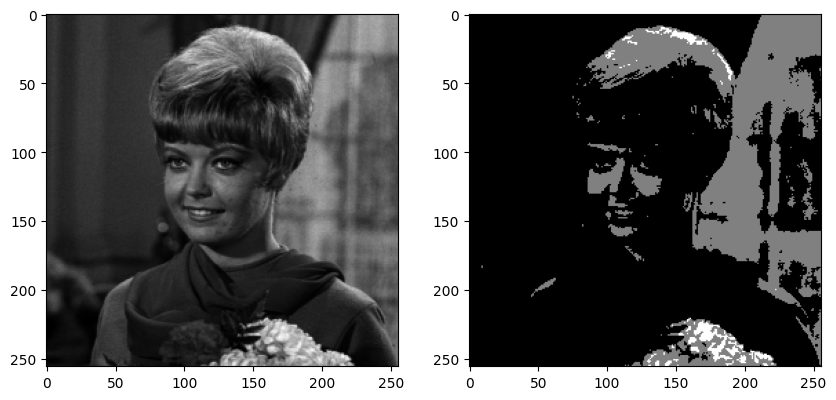

In [3]:
bit_depth = 2

level = 255 / (pow(2, bit_depth) - 1)

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv2.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)

# Melakukan kuantisasi pada gambar dengan kedalaman bit baru
depth_image = np.floor(original / level) * level

# Menampilkan gambar asli dan gambar yang telah dikurangi kedalaman bitnya
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.axis('on')

# Gambar dengan kedalaman bit yang dikurangi
plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.axis('on')

plt.show()

### 3. Buat modul Average Denoising

<ipython-input-4-20a301fe32b4>:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


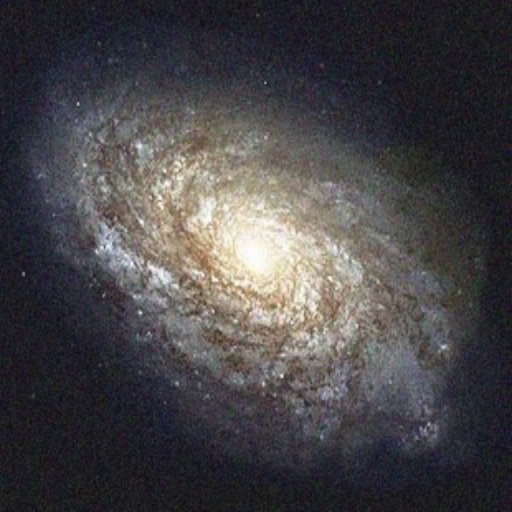

Jumlah Citra: 5, PSNR: 27.54 dB


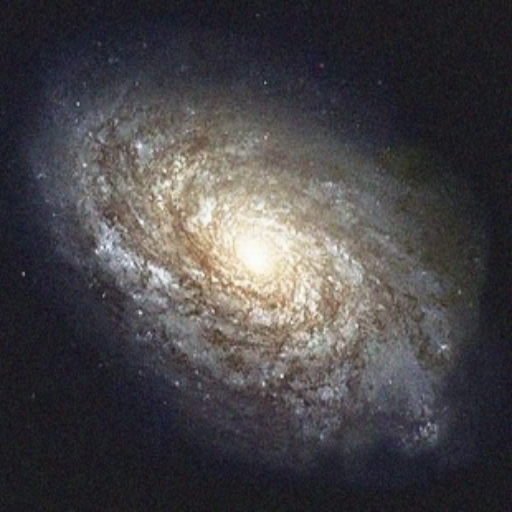

Jumlah Citra: 10, PSNR: 27.50 dB


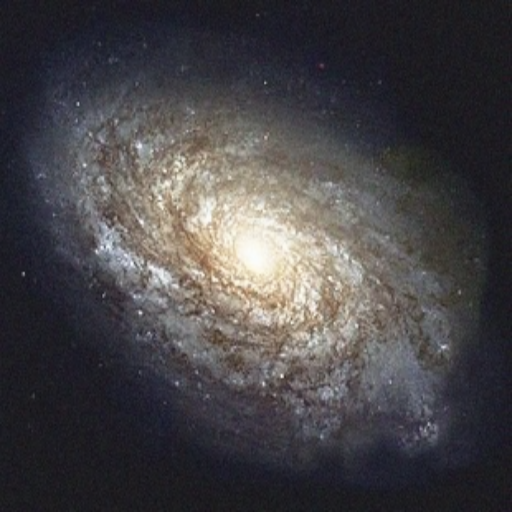

Jumlah Citra: 20, PSNR: 27.44 dB


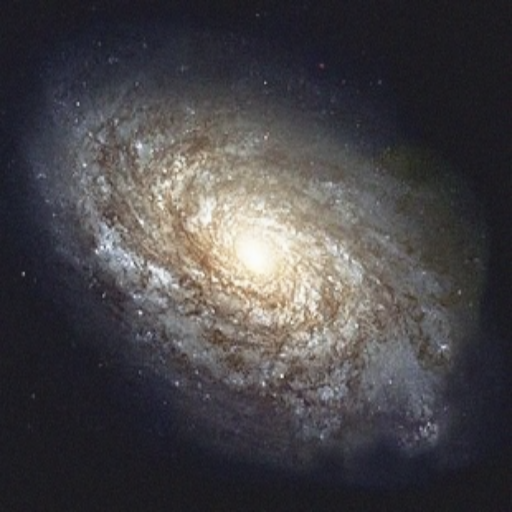

Jumlah Citra: 40, PSNR: 27.38 dB


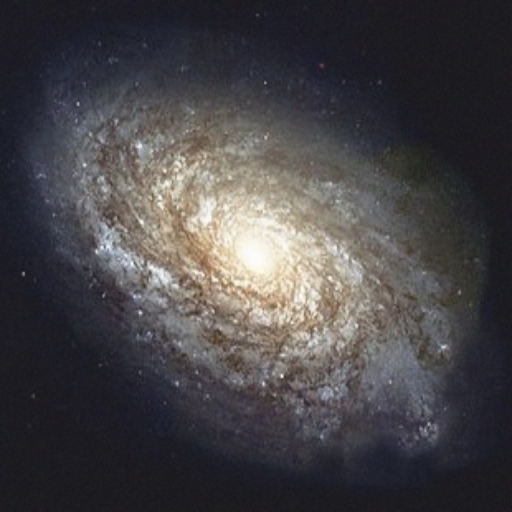

Jumlah Citra: 80, PSNR: 27.21 dB


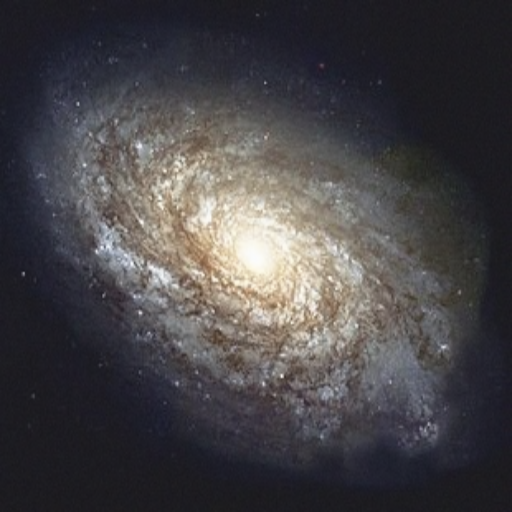

Jumlah Citra: 100, PSNR: 27.14 dB


In [4]:
import cv2 as cv
import glob
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

# Fungsi untuk menghitung PSNR
def psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return 100  # PSNR tak terhingga
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Membaca citra asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
if original_image is None:
    print("Citra asli tidak ditemukan.")
else:
    # Resize citra asli agar semua citra dapat disesuaikan dengan ukuran yang sama
    original_image = cv.resize(original_image, (512, 512))

# Membaca citra dengan noise dari folder yang benar
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    if n is not None:
        n = cv.resize(n, (512, 512))
        cv_img.append(n)
    else:
        print(f"Citra {img} tidak dapat dibaca.")

# Cek apakah ada citra noise yang dibaca
if not cv_img:
    print("Tidak ada citra noise yang ditemukan.")
else:
    # Menginisialisasi DataFrame untuk menyimpan hasil
    results = pd.DataFrame(columns=['Jumlah Citra', 'Nilai PSNR (dB)'])

    # Daftar jumlah citra yang akan digunakan
    num_images_list = [5, 10, 20, 40, 80, 100]

    # Menghitung denoising dan PSNR
    for num_images in num_images_list:
        if num_images > len(cv_img):
            num_images = len(cv_img)  # Pastikan tidak melebihi jumlah citra yang ada

        # Mengambil citra sesuai jumlah yang ditentukan
        selected_images = cv_img[:num_images]

        if selected_images:
            # Melakukan averaging
            average_image = np.mean(selected_images, axis=0).astype(np.uint8)

            # Menghitung PSNR
            psnr_value = psnr(original_image, average_image)

            # Menyimpan hasil
            results = pd.concat([results, pd.DataFrame({
                'Jumlah Citra': [num_images],
                'Nilai PSNR (dB)': [psnr_value]
            })], ignore_index=True)

            # Menampilkan hasil
            cv2_imshow(average_image)
            print(f'Jumlah Citra: {num_images}, PSNR: {psnr_value:.2f} dB')

# Pastikan menutup semua jendela setelah selesai
cv.destroyAllWindows()


### 4. Buat image masking untuk image

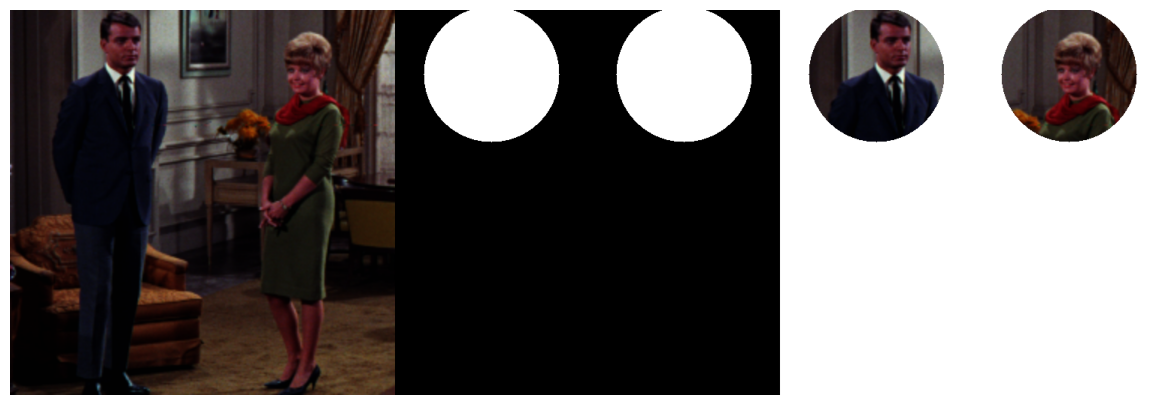

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/PCVK/Images/couple.tiff'
original_image = cv.imread(image_path)

if original_image is None:
    print("Citra asli tidak ditemukan.")
else:
    # Resize gambar jika perlu
    original_image = cv.resize(original_image, (512, 512))

    # Membuat masker untuk menutupi area kepala
    height, width = original_image.shape[:2]
    mask = np.zeros((height, width), dtype=np.uint8)

    # Menggambar lingkaran putih pada masker untuk menutupi kepala
    center1 = (width // 4, height // 6)  # Atur pusat lingkaran di kiri
    radius = 90  # Radius lingkaran
    cv.circle(mask, center1, radius, (255), thickness=-1)

    center2 = (3 * width // 4, height // 6)  # Atur pusat lingkaran di kanan
    cv.circle(mask, center2, radius, (255), thickness=-1)

    # Menerapkan masker untuk menutupi kepala
    head_covered_image = cv.bitwise_and(original_image, original_image, mask=cv.bitwise_not(mask))

    # Membuat gambar hitam dan putih untuk kolom kedua
    white_circle_image = np.zeros_like(original_image)  # Gambar baru dengan latar belakang hitam
    white_circle_image[mask == 255] = (255, 255, 255)  # Warna putih pada area lingkaran

    # Membuat gambar hasil masking dengan latar belakang putih
    masked_image = np.ones_like(original_image) * 255  # Gambar baru dengan latar belakang putih
    masked_image[mask == 255] = original_image[mask == 255]  # Hanya ambil bagian yang ditutupi

    # Menggabungkan gambar
    combined_image = np.hstack((original_image, white_circle_image, masked_image))

    # Menampilkan hasil dengan matplotlib
    plt.figure(figsize=(15, 5))
    plt.imshow(cv.cvtColor(combined_image, cv.COLOR_BGR2RGB))  # Ubah warna dari BGR ke RGB
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()

# Menutup semua jendela setelah selesai
cv.destroyAllWindows()


5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

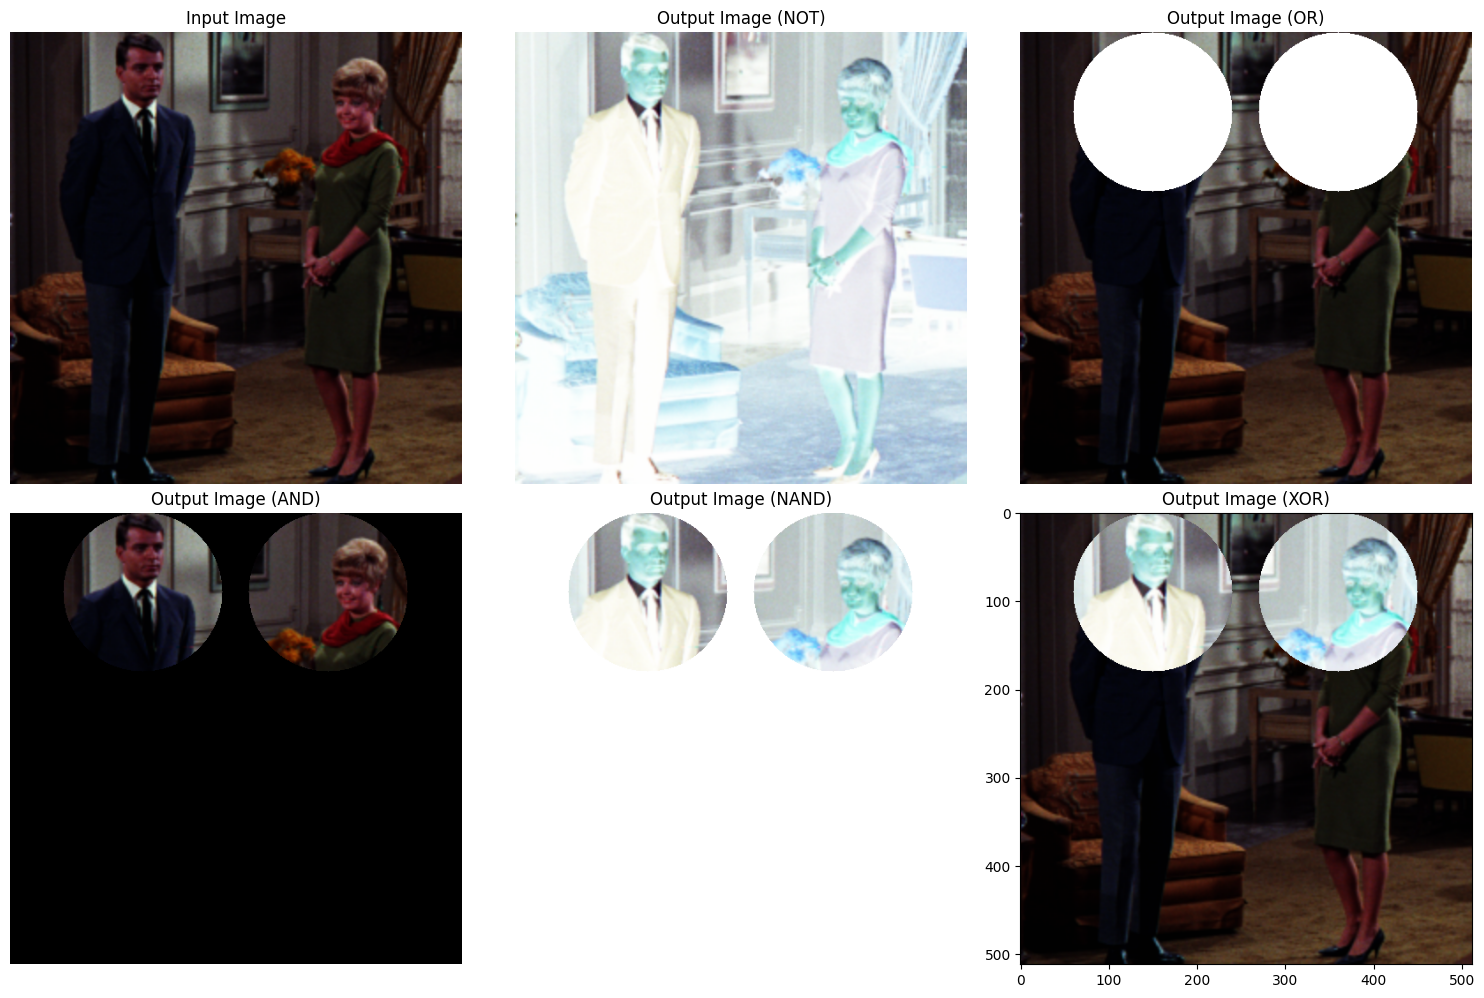

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/PCVK/Images/couple.tiff'
original_image = cv.imread(image_path)

if original_image is None:
    print("Citra asli tidak ditemukan.")
else:
    # Resize gambar jika perlu
    original_image = cv.resize(original_image, (512, 512))

    # Membuat lingkaran putih pada gambar hitam untuk dua wajah
    circle_image = np.zeros_like(original_image)

    # Menentukan pusat dan radius untuk lingkaran pada dua wajah
    # Koordinat wajah pertama (kiri)
    center1 = (150, 90)  # Koordinat untuk wajah pertama
    radius1 = 90  # Radius untuk wajah pertama
    cv.circle(circle_image, center1, radius1, (255, 255, 255), thickness=-1)

    # Koordinat wajah kedua (kanan)
    center2 = (360, 90)  # Koordinat untuk wajah kedua
    radius2 = 90  # Radius untuk wajah kedua
    cv.circle(circle_image, center2, radius2, (255, 255, 255), thickness=-1)

    # Operator NOT
    not_image = cv.bitwise_not(original_image)

    # Operator OR
    or_image = cv.bitwise_or(original_image, circle_image)

    # Operator AND
    and_image = cv.bitwise_and(original_image, circle_image)

    # Operator NAND
    nand_image = cv.bitwise_not(cv.bitwise_and(original_image, circle_image))

    # Operator XOR
    xor_image = cv.bitwise_xor(original_image, circle_image)

    # Menampilkan hasil
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.title('Input Image')
    plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title('Output Image (NOT)')
    plt.imshow(cv.cvtColor(not_image, cv.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title('Output Image (OR)')
    plt.imshow(cv.cvtColor(or_image, cv.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title('Output Image (AND)')
    plt.imshow(cv.cvtColor(and_image, cv.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title('Output Image (NAND)')
    plt.imshow(cv.cvtColor(nand_image, cv.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.title('Output Image (XOR)')
    plt.imshow(cv.cvtColor(xor_image, cv.COLOR_BGR2RGB))
    # plt.axis('off')

    plt.tight_layout()
    plt.show()

# Menutup semua jendela setelah selesai
cv.destroyAllWindows()


### Tugas kelompok

Kelompok 7 ambil bagian berlaku hingga dan foto.

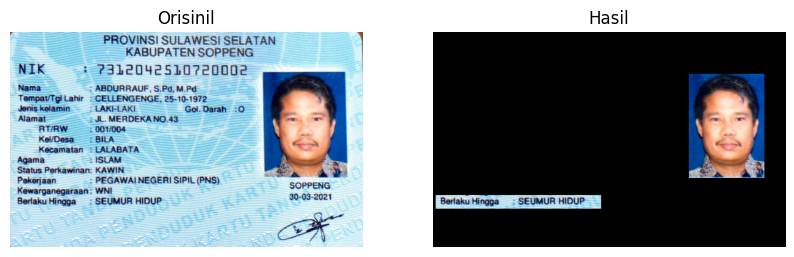

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli dengan OpenCV
image_path = '/content/drive/MyDrive/PCVK/Images/KTP.jpeg'
original_image = cv.imread(image_path)
original_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)  # Konversi ke RGB untuk Matplotlib

# Mengatur kolom dan baris pembanding dengan subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Menampilkan gambar asli
ax[0].imshow(original_image)
ax[0].set_title("Orisinil")
ax[0].axis("off")

# Membuat duplikasi gambar asli
masked_image = np.zeros_like(original_image)  # Gambar hitam dengan ukuran yang sama

# Titik-titik sudut untuk area teks (misalnya tulisan "Berlaku Hingga")
pts_teks = np.array([[6, 370], [380, 370], [380, 400], [6, 400]], np.int32)

# Titik-titik sudut untuk area foto
pts_foto = np.array([[580, 95], [750, 95], [750, 330], [580, 330]], np.int32)

# Buat masker poligon untuk area teks dan foto
mask = np.zeros(original_image.shape[:2], dtype=np.uint8)  # Masker hitam untuk semua area
cv.fillPoly(mask, [pts_teks, pts_foto], 255)  # Area teks dan foto diisi dengan putih pada masker

# Terapkan masker ke gambar asli, hanya area dalam kotak yang terlihat
masked_image[mask == 255] = original_image[mask == 255]

# Simpan gambar hasil masking
masked_image_bgr = cv.cvtColor(masked_image, cv.COLOR_RGB2BGR)  # Konversi hasil masking ke BGR
# cv.imwrite('/content/drive/MyDrive/PCVK/Images/masked_image.jpeg', masked_image_bgr)

# Menampilkan gambar dengan bagian lain hitam
ax[1].imshow(masked_image)
ax[1].set_title("Hasil")
ax[1].axis("off")

# Menampilkan hasil
plt.show()
